# Data Exploration - Amazon Beauty Products Recommendation System

**Bài toán:** Xây dựng hệ thống gợi ý sản phẩm làm đẹp dựa trên lịch sử đánh giá của người dùng

**Dataset:** Amazon Ratings - Beauty Products

## Mục tiêu:
- Khám phá và hiểu cấu trúc dữ liệu ratings
- Phân tích hành vi người dùng (user behavior)
- Phân tích đặc điểm sản phẩm (product characteristics)
- Phân tích phân phối ratings và patterns
- Đặt câu hỏi và trả lời bằng dữ liệu
- Phát hiện insights cho recommendation system

## 1. Import Libraries

**Yêu cầu:** CHỈ sử dụng NumPy để xử lý dữ liệu, Matplotlib và Seaborn để visualization

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Cấu hình
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.set_printoptions(precision=4, suppress=True)

print("✓ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
NumPy version: 2.0.0


## 2. Load Data using NumPy

Load dữ liệu CSV chỉ bằng NumPy (không dùng Pandas)

In [4]:
# Load CSV data using NumPy
data_path = '../data/raw/ratings_Beauty.csv'

def load_csv_numpy(filepath, delimiter=',', skip_header=True):
    """
    Load CSV file using only NumPy
    Returns: data array, header, user_map, product_map
    """
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Get header
    header = lines[0].strip().split(delimiter) if skip_header else None
    
    # Parse data lines
    data_lines = lines[1:] if skip_header else lines
    
    # Preallocate lists for each column
    user_ids = []
    product_ids = []
    ratings = []
    timestamps = []
    
    print(f"Loading {len(data_lines)} records...")
    
    for i, line in enumerate(data_lines):
        if i % 100000 == 0 and i > 0:
            print(f"  Processed {i:,} records...")
        
        parts = line.strip().split(delimiter)
        if len(parts) >= 4:
            user_ids.append(parts[0])
            product_ids.append(parts[1])
            ratings.append(float(parts[2]))
            timestamps.append(int(parts[3]) if parts[3].isdigit() else 0)
    
    # Create structured array using NumPy
    n_records = len(ratings)
    data = np.zeros((n_records, 4))
    
    # Map user_ids and product_ids to indices
    unique_users = list(set(user_ids))
    unique_products = list(set(product_ids))
    
    user_id_map = {uid: idx for idx, uid in enumerate(unique_users)}
    product_id_map = {pid: idx for idx, pid in enumerate(unique_products)}
    
    print("Converting to NumPy arrays...")
    for i in range(n_records):
        data[i, 0] = user_id_map[user_ids[i]]
        data[i, 1] = product_id_map[product_ids[i]]
        data[i, 2] = ratings[i]
        data[i, 3] = timestamps[i]
    
    return data, header, user_id_map, product_id_map

# Load data
print("="*60)
print("LOADING DATA")
print("="*60)

data, header, user_map, product_map = load_csv_numpy(data_path)

print(f"\n✓ Data loaded successfully!")
print(f"✓ Data shape: {data.shape}")
print(f"✓ Columns: {header}")
print(f"✓ Number of unique users: {len(user_map):,}")
print(f"✓ Number of unique products: {len(product_map):,}")

LOADING DATA
Loading 2023070 records...
  Processed 100,000 records...
  Processed 200,000 records...
  Processed 300,000 records...
  Processed 400,000 records...
  Processed 500,000 records...
  Processed 600,000 records...
  Processed 700,000 records...
  Processed 800,000 records...
  Processed 900,000 records...
  Processed 1,000,000 records...
  Processed 1,100,000 records...
  Processed 1,200,000 records...
  Processed 1,300,000 records...
  Processed 1,400,000 records...
  Processed 1,500,000 records...
  Processed 1,600,000 records...
  Processed 1,700,000 records...
  Processed 1,800,000 records...
  Processed 1,900,000 records...
  Processed 2,000,000 records...
Converting to NumPy arrays...

✓ Data loaded successfully!
✓ Data shape: (2023070, 4)
✓ Columns: ['UserId', 'ProductId', 'Rating', 'Timestamp']
✓ Number of unique users: 1,210,271
✓ Number of unique products: 249,274


## 3. Basic Data Information

Hiển thị thông tin cơ bản về dataset

In [ ]:
#statistics
n_ratings = data.shape[0]
n_users = len(np.unique(data[:, 0]))  # Column 0: UserId
n_products = len(np.unique(data[:, 1]))  # Column 1: ProductId

print(f"\n📊 Dataset Overview:")
print(f"  • Total ratings: {n_ratings:,}")
print(f"  • Unique users: {n_users:,}")
print(f"  • Unique products: {n_products:,}")
print(f"  • Data shape: {data.shape}")

# Data types
print(f"\n📋 Data Types:")
print(f"  • Column 0 (UserId): {data[:, 0].dtype}")
print(f"  • Column 1 (ProductId): {data[:, 1].dtype}")
print(f"  • Column 2 (Rating): {data[:, 2].dtype}")
print(f"  • Column 3 (Timestamp): {data[:, 3].dtype}")

# Sample records
print(f"\n📄 Sample Records (first 10):")
print(f"{'UserId':<10} {'ProductId':<10} {'Rating':<8} {'Timestamp':<12}")
print("-" * 50)
for i in range(min(10, n_ratings)):
    print(f"{data[i, 0]:<10.0f} {data[i, 1]:<10.0f} {data[i, 2]:<8.1f} {data[i, 3]:<12.0f}")

# Matrix dimensions
print(f"\n📐 Matrix Information:")
print(f"  • Potential matrix size: {n_users:,} × {n_products:,}")
print(f"  • Total possible entries: {n_users * n_products:,}")
print(f"  • Actual ratings: {n_ratings:,}")
print(f"  • Sparsity: {(1 - n_ratings / (n_users * n_products)) * 100:.4f}%")

BASIC DATA INFORMATION

📊 Dataset Overview:
  • Total ratings: 2,023,070
  • Unique users: 1,210,271
  • Unique products: 249,274
  • Data shape: (2023070, 4)

📋 Data Types:
  • Column 0 (UserId): float64
  • Column 1 (ProductId): float64
  • Column 2 (Rating): float64
  • Column 3 (Timestamp): float64

📄 Sample Records (first 10):
UserId     ProductId  Rating   Timestamp   
--------------------------------------------------
353906     105548     5.0      1369699200  
955839     77748      3.0      1355443200  
501975     77748      5.0      1404691200  
620634     198012     4.0      1382572800  
397591     73064      1.0      1274227200  
884268     235310     5.0      1404518400  
276187     162961     5.0      1371945600  
1026163    158524     5.0      1373068800  
1005467    166866     5.0      1401840000  
526        177777     4.0      1389052800  

📐 Matrix Information:
  • Potential matrix size: 1,210,271 × 249,274
  • Total possible entries: 301,689,093,254
  • Actual rating

## 4. Descriptive Statistics

Tính toán thống kê mô tả cho ratings sử dụng NumPy

DESCRIPTIVE STATISTICS

📊 Central Tendency:
  • Mean:   4.1490
  • Median: 5.0000
  • Mode:   5

📏 Dispersion:
  • Std Dev:  1.3115
  • Variance: 1.7200
  • Range:    4.0 (from 1.0 to 5.0)
  • IQR:      1.0000

📈 Quantiles:
  • Min (0%):    1.00
  • Q1 (25%):    4.00
  • Q2 (50%):    5.00
  • Q3 (75%):    5.00
  • Max (100%):  5.00

📐 Shape:
  • Skewness: -1.3914 (Left-skewed: more high ratings)
  • Kurtosis: 0.5811 (Heavy tails: more extreme values)


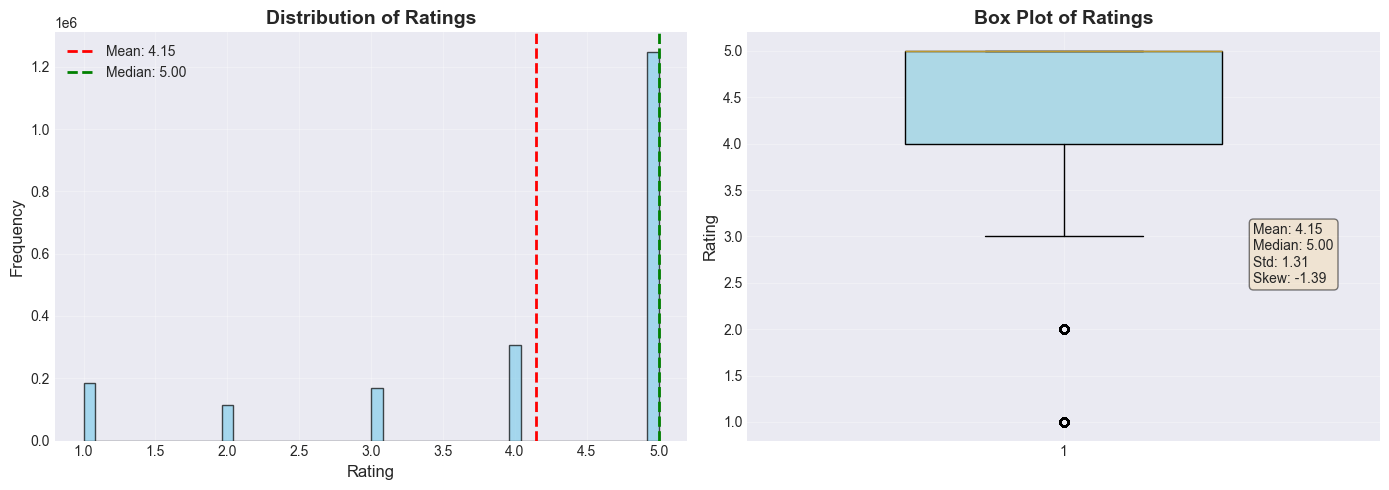


✓ Descriptive statistics completed!


In [6]:
print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

# Extract ratings column
ratings = data[:, 2]

# Basic statistics using NumPy
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_rating = np.std(ratings)
var_rating = np.var(ratings)
min_rating = np.min(ratings)
max_rating = np.max(ratings)

# Quantiles
q25 = np.percentile(ratings, 25)
q50 = np.percentile(ratings, 50)  # Same as median
q75 = np.percentile(ratings, 75)
iqr = q75 - q25

print(f"\n📊 Central Tendency:")
print(f"  • Mean:   {mean_rating:.4f}")
print(f"  • Median: {median_rating:.4f}")
print(f"  • Mode:   {np.bincount(ratings.astype(int)).argmax():.0f}")

print(f"\n📏 Dispersion:")
print(f"  • Std Dev:  {std_rating:.4f}")
print(f"  • Variance: {var_rating:.4f}")
print(f"  • Range:    {max_rating - min_rating:.1f} (from {min_rating:.1f} to {max_rating:.1f})")
print(f"  • IQR:      {iqr:.4f}")

print(f"\n📈 Quantiles:")
print(f"  • Min (0%):    {min_rating:.2f}")
print(f"  • Q1 (25%):    {q25:.2f}")
print(f"  • Q2 (50%):    {q50:.2f}")
print(f"  • Q3 (75%):    {q75:.2f}")
print(f"  • Max (100%):  {max_rating:.2f}")

# Calculate skewness and kurtosis manually using NumPy
# Skewness = E[(X - μ)³] / σ³
centered = ratings - mean_rating
skewness = np.mean(centered ** 3) / (std_rating ** 3)

# Kurtosis = E[(X - μ)⁴] / σ⁴ - 3 (excess kurtosis)
kurtosis = np.mean(centered ** 4) / (std_rating ** 4) - 3

print(f"\n📐 Shape:")
print(f"  • Skewness: {skewness:.4f}", end="")
if skewness < -0.5:
    print(" (Left-skewed: more high ratings)")
elif skewness > 0.5:
    print(" (Right-skewed: more low ratings)")
else:
    print(" (Approximately symmetric)")

print(f"  • Kurtosis: {kurtosis:.4f}", end="")
if kurtosis > 0:
    print(" (Heavy tails: more extreme values)")
elif kurtosis < 0:
    print(" (Light tails: fewer extreme values)")
else:
    print(" (Normal-like distribution)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(ratings, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')
ax1.axvline(median_rating, color='green', linestyle='--', linewidth=2, label=f'Median: {median_rating:.2f}')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Ratings', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2 = axes[1]
box = ax2.boxplot(ratings, vert=True, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightblue')
ax2.set_ylabel('Rating', fontsize=12)
ax2.set_title('Box Plot of Ratings', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add statistics text
stats_text = f"Mean: {mean_rating:.2f}\nMedian: {median_rating:.2f}\nStd: {std_rating:.2f}\nSkew: {skewness:.2f}"
ax2.text(1.3, max_rating * 0.5, stats_text, fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✓ Descriptive statistics completed!")

## 5. Missing Values Analysis

Kiểm tra missing values trong dataset

In [7]:
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Check for NaN values in numeric data
nan_counts = np.sum(np.isnan(data), axis=0)
total_records = data.shape[0]

column_names = ['UserId', 'ProductId', 'Rating', 'Timestamp']

print(f"\n🔍 Missing Values Check:")
print(f"{'Column':<15} {'Missing Count':<15} {'Percentage':<15} {'Status'}")
print("-" * 60)

has_missing = False
for i, col_name in enumerate(column_names):
    missing_count = int(nan_counts[i])
    missing_pct = (missing_count / total_records) * 100
    status = "✓ Clean" if missing_count == 0 else "⚠ Has Missing"
    print(f"{col_name:<15} {missing_count:<15,} {missing_pct:<15.2f} {status}")
    if missing_count > 0:
        has_missing = True

print("\n" + "="*60)
if not has_missing:
    print("✓ No missing values detected! Dataset is complete.")
else:
    print("⚠ Missing values detected! Preprocessing required.")
print("="*60)

# Check for zero values (potential issues)
print(f"\n🔍 Zero Values Check:")
zero_ratings = np.sum(data[:, 2] == 0)
zero_timestamps = np.sum(data[:, 3] == 0)

print(f"  • Zero ratings: {zero_ratings:,} ({(zero_ratings/total_records)*100:.2f}%)")
print(f"  • Zero timestamps: {zero_timestamps:,} ({(zero_timestamps/total_records)*100:.2f}%)")

if zero_ratings > 0:
    print("  ⚠ Warning: Some ratings are 0 (invalid for 1-5 scale)")

# Visualize missing data
if has_missing or zero_ratings > 0 or zero_timestamps > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    issues = {
        'UserId\nNaN': nan_counts[0],
        'ProductId\nNaN': nan_counts[1],
        'Rating\nNaN': nan_counts[2],
        'Timestamp\nNaN': nan_counts[3],
        'Rating\nZero': zero_ratings,
        'Timestamp\nZero': zero_timestamps
    }
    
    x_pos = np.arange(len(issues))
    counts = list(issues.values())
    colors = ['red' if c > 0 else 'green' for c in counts]
    
    bars = ax.bar(x_pos, counts, color=colors, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Column / Issue Type', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Data Quality Issues Overview', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(issues.keys(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                   f'{count:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("\n✓ Missing values analysis completed!")

MISSING VALUES ANALYSIS

🔍 Missing Values Check:
Column          Missing Count   Percentage      Status
------------------------------------------------------------
UserId          0               0.00            ✓ Clean
ProductId       0               0.00            ✓ Clean
Rating          0               0.00            ✓ Clean
Timestamp       0               0.00            ✓ Clean

✓ No missing values detected! Dataset is complete.

🔍 Zero Values Check:
  • Zero ratings: 0 (0.00%)
  • Zero timestamps: 0 (0.00%)

✓ Missing values analysis completed!


## 6. Rating Distribution Analysis

Phân tích phân phối của ratings

In [8]:
# TODO: Analyze rating distribution
# 1. Count frequency of each rating value (1, 2, 3, 4, 5)
# 2. Calculate percentage for each rating
# 3. Visualize:
#    - Histogram of ratings
#    - Bar chart showing rating counts
#    - Pie chart showing rating proportions

# Check for rating bias (e.g., more 5-star ratings?)

## 7. User Behavior Analysis

Phân tích hành vi người dùng

### 7.1. Number of Ratings per User

In [9]:
# TODO: Calculate ratings per user using NumPy
# Use np.unique() with return_counts=True
# - Distribution of number of ratings per user
# - Mean, median, std of ratings per user
# - Top 10 most active users
# - Percentage of users with only 1 rating (cold start problem)

# Visualize:
# - Histogram of ratings per user
# - Log-scale histogram (if power-law distribution)

### 7.2. User Rating Behavior

In [10]:
# TODO: Analyze user rating patterns
# - Average rating per user (user bias)
# - User rating variance (harsh vs generous raters)
# - Distribution of user mean ratings

# Identify user types:
# - Harsh raters (mean rating < 3)
# - Generous raters (mean rating > 4)
# - Balanced raters (mean rating ≈ 3.5)

## 8. Product Analysis

Phân tích đặc điểm sản phẩm

### 8.1. Number of Ratings per Product

In [11]:
# TODO: Calculate ratings per product
# - Distribution of ratings per product
# - Top 20 most reviewed products
# - Products with few ratings (cold start problem)
# - Percentage of products with < 5 ratings

# Visualize:
# - Histogram of ratings per product
# - Bar chart of top products

### 8.2. Product Rating Quality

In [12]:
# TODO: Analyze product quality
# - Average rating per product
# - Top 20 highest rated products (with min. reviews threshold)
# - Top 20 lowest rated products
# - Product rating variance (controversial products)
# - Correlation between popularity and rating

## 9. Temporal Analysis

Phân tích xu hướng theo thời gian (nếu có timestamp)

In [13]:
# TODO: Temporal analysis (if timestamp available)
# - Number of ratings over time (line chart)
# - Average rating trends over time
# - Seasonal patterns (monthly, yearly)
# - Peak activity periods

# Check for:
# - Rating inflation over time
# - Product lifecycle patterns

## 10. Data Sparsity Analysis

Phân tích độ thưa của dữ liệu - quan trọng cho recommendation systems!

In [14]:
# TODO: Calculate sparsity of user-item matrix
# Sparsity = 1 - (number of ratings / (n_users × n_products))

# Example:
# sparsity = 1 - (n_ratings / (n_users * n_products))
# density = (n_ratings / (n_users * n_products)) * 100

# Visualize:
# - Sample heatmap of user-item matrix (small subset)
# - Distribution of non-zero entries per row/column

## 11. Exploratory Questions

Đặt và trả lời các câu hỏi về dữ liệu

### Câu hỏi 1: Có hiện tượng rating polarization không?

Người dùng có xu hướng cho điểm cực cao (5 sao) hoặc cực thấp (1 sao), ít cho điểm trung bình?

In [15]:
# TODO: Analyze rating polarization
# - Compare frequency of extreme ratings (1, 5) vs middle ratings (2, 3, 4)
# - Visualize with bar chart và pie chart

### Câu hỏi 2: Sản phẩm nổi bật nhất là gì?

Xác định sản phẩm có sự kết hợp tốt giữa số lượng ratings và chất lượng ratings

In [16]:
# TODO: Find outstanding products
# Calculate popularity score: weighted rating
# Formula: weighted_rating = (v/(v+m)) * R + (m/(v+m)) * C
# Where:
# v = number of ratings for the product
# m = minimum ratings threshold
# R = average rating for the product
# C = mean rating across all products

# Visualize top products với scatter plot (ratings count vs avg rating)

### Câu hỏi 3: Có tồn tại "power users" không?

Phân tích sự phân bố hoạt động của users - có một nhóm nhỏ users đóng góp phần lớn ratings?

In [17]:
# TODO: Analyze power users
# - Calculate cumulative percentage of ratings
# - Create Pareto chart (80-20 rule?)
# - What % of users contribute 80% of ratings?

# This is important for:
# - Understanding data concentration
# - Cold start problem severity

### Câu hỏi 4: Có mối quan hệ giữa số lượng ratings và average rating?

Sản phẩm phổ biến có xu hướng được đánh giá cao hơn không?

In [18]:
# TODO: Correlation analysis
# - Calculate correlation between popularity and rating
# - Scatter plot with trend line
# - Statistical significance test

# Use NumPy to calculate Pearson correlation:
# r = cov(X,Y) / (std(X) * std(Y))

### Câu hỏi 5: Cold Start Problem nghiêm trọng như thế nào?

Phân tích số lượng users và products có ít tương tác

In [19]:
# TODO: Analyze cold start problem
# - % of users with <= 5 ratings
# - % of products with <= 5 ratings
# - Distribution of ratings per user/product

# Impact on recommendation system:
# - Hard to make recommendations for new users/products
# - Need different strategies (content-based, popularity-based)

### Câu hỏi 6: Phân khúc người dùng (User Segmentation)

Có thể chia người dùng thành các nhóm dựa trên hành vi rating không?

## 12. User-Item Matrix Visualization

Visualize một sample của user-item matrix

In [20]:
# TODO: Create and visualize sample user-item matrix
# - Select 50 most active users
# - Select 50 most popular products
# - Create 50x50 matrix
# - Visualize with heatmap

# This helps visualize sparsity và patterns

## 13. Key Insights & Summary

Tổng kết các phát hiện quan trọng

### Key Findings:

**Về Dataset:**
- TODO: Kích thước dataset, số users, số products
- TODO: Mức độ sparse của data
- TODO: Chất lượng data (missing values, outliers)

**Về User Behavior:**
- TODO: Phân bố hoạt động users
- TODO: Rating patterns (harsh/generous raters)
- TODO: Cold start users

**Về Products:**
- TODO: Sản phẩm phổ biến
- TODO: Product quality distribution
- TODO: Cold start products

**Về Ratings:**
- TODO: Rating distribution và bias
- TODO: Temporal trends
- TODO: Correlations

**Implications cho Recommendation System:**
- TODO: Challenges cần giải quyết
- TODO: Strategies phù hợp (collaborative filtering, content-based, hybrid)
- TODO: Đề xuất tiền xử lý cần thiết

In [21]:
# TODO: Phân khúc users theo nhiều tiêu chí
# 1. Activity level:
#    - Light users: 1-5 ratings
#    - Medium users: 6-20 ratings  
#    - Heavy users: >20 ratings
#
# 2. Rating behavior:
#    - Harsh critics: mean rating < 3.0
#    - Selective buyers: mean rating 3.0-4.0
#    - Enthusiasts: mean rating > 4.0
#
# 3. Rating variance:
#    - Consistent: std < 0.5
#    - Moderate: std 0.5-1.5
#    - Diverse opinions: std > 1.5

# Business Application:
# - Personalized recommendation strategies per segment
# - Targeted marketing campaigns
# - Identify brand advocates (enthusiasts with high activity)

# Visualize:
# - 2D scatter plot: Activity (x-axis) vs Mean Rating (y-axis)
# - Color by variance
# - Size by total ratings
# - Annotate segment boundaries

### Câu hỏi 7: Product Lifecycle - Sản phẩm "Rising Stars" và "Falling Stars"

Phát hiện sản phẩm đang lên (trending) và sản phẩm đang xuống (declining)

In [22]:
# TODO: Phân tích product lifecycle nếu có timestamp
# 1. Chia timeline thành periods (ví dụ: quarterly)
# 2. Tính số ratings và avg rating mỗi period cho từng product
# 3. Tính growth rate:
#    growth_rate = (recent_ratings - old_ratings) / old_ratings
#
# Rising Stars:
# - Positive growth rate
# - Improving average rating
# - Increasing review frequency
#
# Falling Stars:
# - Negative growth rate
# - Declining ratings
# - Decreasing review frequency
#
# Stable Products:
# - Consistent rating volume
# - Stable quality

# Business Application:
# - Inventory management: Stock up on rising stars
# - Promotional strategy: Boost falling stars or discontinue
# - Recommendation priority: Feature trending products
# - New product launch insights

# Visualize:
# - Line chart: Rating count over time for top rising/falling products
# - Scatter: Growth rate vs Current avg rating
# - Heatmap: Product performance matrix

### Câu hỏi 8: Cross-Product Purchase Patterns

Có nhóm sản phẩm nào thường được mua cùng nhau không?

In [23]:
# TODO: Phân tích co-occurrence patterns
# 1. Tạo user-product matrix (binary: rated or not)
# 2. Calculate product co-occurrence matrix:
#    Co-occurrence(i,j) = number of users who rated both product i and j
# 3. Normalize by product popularity
# 4. Calculate lift score:
#    lift(i,j) = P(i,j) / (P(i) * P(j))
#    Where P(i,j) = probability both rated together
#          P(i), P(j) = individual probabilities

# Find product pairs với:
# - High co-occurrence count
# - High lift score (> 1 means positive association)

# Business Application:
# - Bundle recommendations: "Customers who bought X also bought Y"
# - Cross-selling opportunities
# - Product placement in store/website
# - Combo deals and promotions

# Visualize:
# - Network graph: Products as nodes, co-occurrence as edges
# - Heatmap: Top 30 products co-occurrence matrix
# - Bar chart: Top product pairs by lift score

# Example insights:
# - Shampoo + Conditioner (expected)
# - Lipstick + Eye shadow (complementary)
# - Face cream + Serum (product line)

### Câu hỏi 9: Rating Reliability - Sản phẩm nào có ratings đáng tin cậy?

Đánh giá độ tin cậy của ratings dựa trên số lượng và consistency

In [24]:
# TODO: Calculate rating reliability score
# Reliability factors:
# 1. Sample size: More ratings = more reliable
# 2. Rating consistency: Low variance = more reliable
# 3. Recency: Recent ratings more relevant (if timestamp available)
# 4. Reviewer diversity: More unique users = less bias

# Calculate Confidence Score:
# confidence = (n_ratings / (n_ratings + k)) * consistency_factor
# Where:
# - k = threshold constant (e.g., 10)
# - consistency_factor = 1 / (1 + std_rating)

# Identify categories:
# - High confidence products: Many ratings, low variance
# - Controversial products: Many ratings, high variance
# - Uncertain products: Few ratings (need more data)

# Calculate Wilson Score Confidence Interval (advanced):
# For binary outcomes (positive/negative), gives lower bound of true rating

# Business Application:
# - Quality control: Flag products with low confidence for review
# - Recommendation confidence: Show reliability indicators to users
# - Inventory decisions: Prioritize high-confidence high-rated products
# - A/B testing: Focus improvement efforts on uncertain products

# Visualize:
# - Scatter plot: Number of ratings vs Rating variance
# - Color by average rating
# - Size by confidence score
# - Quadrant analysis:
#   * Top-right: Popular & Reliable (safe bets)
#   * Top-left: Popular & Controversial (investigate)
#   * Bottom-right: Niche & Reliable (hidden gems)
#   * Bottom-left: Uncertain (need data)

### Câu hỏi 10: Market Basket Analysis - Loyalty Patterns

Người dùng có trung thành với nhóm sản phẩm nào? Churn risk ở đâu?

In [25]:
# TODO: Phân tích loyalty patterns
# 1. User loyalty metrics:
#    - Product diversity: Unique products / Total ratings
#    - Average rating trend: Early ratings vs Recent ratings
#    - Rating frequency: Time between ratings (if timestamp available)
#
# 2. Identify user types:
#    Loyal fans:
#    - High ratings consistently (>4.0)
#    - Low product diversity (stick to favorites)
#    - Regular activity
#
#    Explorers:
#    - High product diversity
#    - Variable ratings
#    - Frequent activity
#
#    Churned/At-risk:
#    - Declining average ratings over time
#    - Increasing time gaps between purchases
#    - Recent low ratings
#
#    One-time buyers:
#    - Single rating
#    - No return

# Calculate churn indicators:
# - Time since last rating (recency)
# - Negative rating trend
# - Comparison with historical behavior

# Business Application:
# - Retention campaigns: Target at-risk users
# - Win-back campaigns: Re-engage churned users
# - Loyalty rewards: Incentivize loyal fans
# - Product recommendations: 
#   * Loyal fans → Similar products in same category
#   * Explorers → Diverse recommendations
# - Customer lifetime value prediction

# Visualize:
# - Sankey diagram: User journey through product categories
# - Cohort analysis: Rating behavior over user lifecycle
# - RFM analysis adapted:
#   * Recency: Time since last rating
#   * Frequency: Number of ratings
#   * Monetary (proxy): Average rating (satisfaction level)

### Câu hỏi 11: Price-Quality Perception (nếu có dữ liệu giá)

Có mối quan hệ giữa rating và nhóm giá sản phẩm không?

In [26]:
# TODO: Price-Quality analysis (if price data available in product metadata)
# Note: Nếu không có price data, có thể infer từ rating patterns
#
# 1. Categorize products by price tier (if available):
#    - Budget: < 25th percentile
#    - Mid-range: 25th - 75th percentile
#    - Premium: > 75th percentile
#
# 2. Alternative: Infer "perceived value" từ ratings:
#    High-value products: High ratings + Many reviews
#    Low-value products: Low ratings despite popularity
#
# 3. Analyze:
#    - Average rating per price tier
#    - Rating variance per price tier
#    - Customer expectations: Do expensive products need higher ratings?
#    - Value for money: High rating + Lower price tier

# Calculate "bang for buck" score:
# value_score = avg_rating / (price_tier_normalized + epsilon)

# Identify:
# - Overperformers: Budget/Mid-range with premium-level ratings
# - Underperformers: Premium with mediocre ratings
# - Sweet spots: Best value for money

# Business Application:
# - Pricing strategy: Adjust prices based on perceived value
# - Marketing positioning: Highlight value products
# - Premium justification: Ensure premium products deliver quality
# - Recommendation diversity: Mix price tiers in recommendations
# - Competitive analysis: Compare similar products across tiers

# Visualize:
# - Box plots: Rating distribution per price tier
# - Scatter plot: Price vs Rating (if data available)
# - Bar chart: Value score leaders
# - Heatmap: Price tier × Rating category matrix

### Câu hỏi 12: Rating Velocity - Momentum Analysis

Sản phẩm nào đang được rating nhiều đột ngột? (Viral products)

In [27]:
# TODO: Analyze rating velocity and momentum (requires timestamp)
# 1. Calculate rating velocity:
#    velocity = ratings_in_recent_period / ratings_in_previous_period
#    
# 2. Calculate acceleration:
#    acceleration = change in velocity over time
#
# 3. Identify patterns:
#    Viral products:
#    - High velocity (many recent ratings)
#    - Positive acceleration (accelerating growth)
#    - Sudden spike in activity
#
#    Steady growers:
#    - Consistent positive velocity
#    - Stable acceleration
#
#    Declining products:
#    - Negative velocity
#    - Negative acceleration
#
#    Seasonal products:
#    - Periodic velocity spikes
#    - Predictable patterns

# Calculate momentum score:
# momentum = (recent_ratings / avg_ratings_per_period) * (recent_avg_rating / overall_avg)

# Business Application:
# - Trend spotting: Catch viral products early
# - Inventory management: Stock up on high-momentum products
# - Marketing timing: Promote products at peak momentum
# - Recommendation freshness: Feature trending products
# - Competitive intelligence: Track momentum vs competitors
# - Product launch success: Monitor new product momentum

# Visualize:
# - Time series: Rating count over time for viral products
# - Velocity chart: Rate of change visualization
# - Momentum heatmap: Products × Time periods
# - Acceleration scatter: Current velocity vs acceleration
# - Top movers dashboard: Biggest gainers/losers

# Real-world examples:
# - Holiday season spikes (e.g., gift sets)
# - Influencer effects (sudden popularity after review)
# - Seasonal trends (sunscreen in summer)
# - Competitor product failures (switchers)

### Câu hỏi 13: User Influence Score - Ai là Key Opinion Leaders?

Xác định users có ảnh hưởng cao (ratings của họ predict được behaviors của others)

In [28]:
# TODO: Calculate user influence scores
# Influence factors:
# 1. Activity level:
#    - Number of ratings
#    - Diversity of products rated
#
# 2. Early adopter behavior:
#    - Among first to rate new products (if timestamp)
#    - Ratings on niche/less popular items
#
# 3. Rating impact:
#    - Agreement with community: How often user rating aligns with final consensus
#    - Predictive power: User rates high → product becomes popular
#    - Contrarian accuracy: User finds hidden gems others missed
#
# 4. Expertise indicators:
#    - Detailed ratings (if text reviews available)
#    - Consistent rating behavior
#    - Coverage of product categories

# Calculate influence score:
# influence = w1 * activity_score + 
#             w2 * early_adopter_score + 
#             w3 * prediction_accuracy_score +
#             w4 * diversity_score

# For prediction accuracy:
# - Compare user's early rating vs product's eventual average
# - Reward users whose ratings predict future popularity
# - Calculate correlation between user rating and product success

# Identify user tiers:
# - Influencers: High influence, high activity, early adopters
# - Experts: High accuracy, niche focus, consistent ratings
# - Casual users: Low influence, sporadic activity
# - Followers: Late adopters, rate popular items

# Business Application:
# - Influencer partnerships: Engage high-influence users
# - Beta testing: Invite influencers to try new products
# - User-generated content: Encourage reviews from experts
# - Weighted recommendations: Give more weight to influencer ratings
# - Community building: Create expert/influencer badges
# - Product seeding: Send samples to key opinion leaders
# - Credibility indicators: Show "Expert rated 4.5★" separately

# Visualize:
# - Influence distribution: Histogram of influence scores
# - Scatter plot: Activity vs Influence (are they correlated?)
# - Network graph: User influence relationships
# - Leaderboard: Top 50 most influential users
# - Influence over time: Track how influence changes

### Câu hỏi 14: Recommendation Diversity vs Accuracy Trade-off

Balance giữa recommend sản phẩm tương tự vs khám phá sản phẩm mới

In [29]:
# TODO: Analyze diversity patterns in user behavior
# 1. Calculate user exploration behavior:
#    Diversity Index = Entropy of product categories rated
#    entropy = -Σ(p_i * log(p_i))
#    where p_i = proportion of ratings in category i
#
# 2. Similarity within user's rated products:
#    - Calculate avg pairwise similarity of products user rated
#    - Use rating patterns of all users as feature space
#    - High similarity = user likes similar products (easy to recommend)
#    - Low similarity = diverse taste (hard but interesting)
#
# 3. Exploration vs Exploitation:
#    Exploitation: Rating products similar to past high-rated items
#    Exploration: Rating diverse/different products
#
# 4. Calculate per user:
#    - % of ratings on popular products (>100 reviews)
#    - % of ratings on niche products (<10 reviews)
#    - Sequential pattern: Do they alternate or cluster?

# Segment users by recommendation strategy:
# - Conservative users (high similarity, low diversity):
#   → Recommend similar popular items (safe bets)
#   → Collaborative filtering works well
#
# - Adventurous users (low similarity, high diversity):
#   → Recommend diverse items from multiple categories
#   → Content-based + serendipity important
#   → "Because you like variety" recommendations
#
# - Balanced users:
#   → Hybrid approach with some exploration

# Business Application:
# - Personalized recommendation strategy per user type
# - A/B testing: Test diversity levels in recommendations
# - User satisfaction: Match recommendation diversity to user preference
# - Product discovery: Help users find hidden gems
# - Filter bubble avoidance: Prevent over-specialization
# - Long-tail promotion: Use diversity-loving users to promote niche items

# Calculate system-level metrics:
# - Aggregate diversity: How many unique items recommended across all users?
# - Coverage: What % of catalog gets recommended?
# - Serendipity: How often do users rate high on unexpected recommendations?

# Visualize:
# - User scatter: Diversity Index vs Average Rating
# - Distribution: Histogram of user diversity scores
# - Category sunburst: Rating distribution across categories per user type
# - Trade-off curve: Recommendation accuracy vs diversity
# - Temporal: Does diversity change over user lifecycle?